<a href="https://colab.research.google.com/github/tseronni/Sirius2023/blob/main/C%C3%B3pia_de_Desafio_6_Estat%C3%ADsticas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div>
    <p style="float: right;"><img src="https://media.swipepages.com/2021/2/sirius-logo-principal-tag-1-300.png" height="80px"border="1px"></p>
    
</div>
<h1>Nano Desafio 6 </h1>
<h2>Pandas - estatísticas </h2>

Aluno: 

Data:

##### Introdução

Já conhecemos o pandas e um pouco do seu poder para analisar dados! Agora vamos fazer alguns calculos estatísticos usando essa ferramenta já no ritmo de despedida e também como uma  prévia do que esta por vir. Afinal você está crescendo e sua jornada de Introdução ao Python está chegando ao fim!!! 

A Estatística já está batendo a porta e dando boas vindas!!

##### Estatísticas
Estatísticas resumo, para que servem? Adivinhe? - elas "resumem" muitos números!!!. Por exemplo, média, mediana, mínimo, máximo e desvio padrão são estatísticas resumidas. O cálculo de estatísticas resumidas permitem que você tenha uma noção melhor de seus dados, mesmo que você tenha milhares ou milhões!!

##### O conjunto de dados
A Walt Disney Studios já produziu mais de 600 filmes desde seu filme de estreia, Branca de Neve e os Sete Anões, em 1937. Vamos, explorar um conjunto de dados de filmes da Disney !! Esses dados foram compilados por <a href="https://data.world/kgarrett/disney-character-success-00-16">Kelly Garrett</a>. Os dados contêm 579 filmes da Disney com seis características: título do filme, data de lançamento, gênero, classificação MPAA, bilheteria bruta  e bilheteria ajustada pela inflação. </p>

1 -Importe o  [dataset disney_movies_total_gross.csv](https://drive.google.com/file/d/1WtNcv-0XV5j954UNDkf2GW60vZHpqpzl/view?usp=sharing) e salvar com o nome dados.

In [ ]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

dados = pd.read_csv('/content/drive/MyDrive/sirius/exercicios/arquivos/disney_movies_total_gross.csv', parse_dates =['release_date'])

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


2 -  Imprima as primeiras linhas desse dataset

In [ ]:
dados.head()

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808
3,Song of the South,1946-11-12,Adventure,G,65000000,1078510579
4,Cinderella,1950-02-15,Drama,G,85000000,920608730


Obs.: Motion Picture Association of America (MPAA) - é uma associação que tem por objetivo original garantir a viabilidade da indústria cinematográfica norte-americana. Além disso, a MPA estabeleceu diretrizes para o conteúdo de filmes que resultaram na criação do Código de Produção em 1930. 
Por exemplo, a classificação de filmes segundo essa associação é:

![wikipedia](mpaa_rating.png)

fonte:https://pt.wikipedia.org/wiki/Motion_Picture_Association

Agora, antes de mais nada vamos renomear as colunas para ficar mais fácil o entendimento?

['tit_do_filme','dt_lancamento','genero','classificacao_mpaa','bilheteria_bruta','bilheteria_ajustada_inflacao']

3 - Veja o dataset agora:

In [ ]:
dados.rename(columns={'movie_title': 'tit_do_filme',
                      'release_date': 'dt_lancamento',
                      'genre': 'genero',
                      'mpaa_rating': 'classificacao_mpaa',
                      'total_gross': 'bilheteria_bruta',
                      'inflation_adjusted_gross': 'bilheteria_ajustada_inflacao'}, inplace=True)

4 -Imprima informações básicas sobre o DataFrame

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   tit_do_filme                  579 non-null    object        
 1   dt_lancamento                 579 non-null    datetime64[ns]
 2   genero                        562 non-null    object        
 3   classificacao_mpaa            523 non-null    object        
 4   bilheteria_bruta              579 non-null    int64         
 5   bilheteria_ajustada_inflacao  579 non-null    int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 27.3+ KB


5 - Calcule a média da bilheteria ajustada

In [ ]:
dados.bilheteria_ajustada_inflacao.mean()

118762523.31088082

6 - Calcule a mediana da bilheterias ajustada

In [ ]:
dados.bilheteria_ajustada_inflacao.median()

55159783.0

7 - Encontre as datas máximas e minimas de lançamentos de filmes nesse dataset

In [ ]:
print(f'Data máxima: {dados.dt_lancamento.max()}.\nData mínima: {dados.dt_lancamento.min()}')

Data máxima: 2016-12-16 00:00:00.
Data mínima: 1937-12-21 00:00:00


8 - Qual filme tem maior bilheteria_ajustada_inflacao ?

In [ ]:
print(f'Filme como maior bilheteria: {dados.tit_do_filme.iloc[dados.bilheteria_ajustada_inflacao.idxmax()]}')

Filme como maior bilheteria: Snow White and the Seven Dwarfs


9 - Ordene os dados por dt_lancamento e chame de data_ordenada

In [ ]:
dados['data_ordenada'] = dados.sort_values(by='dt_lancamento')['dt_lancamento']
dados['data_ordenada']

0     1937-12-21
1     1940-02-09
2     1940-11-13
3     1946-11-12
4     1950-02-15
         ...    
574   2016-09-02
575   2016-09-23
576   2016-11-04
577   2016-11-23
578   2016-12-16
Name: data_ordenada, Length: 579, dtype: datetime64[ns]

10- Obtenha a soma cumulativa da bilheteria_ajustada_inflacao,adicione ao dataset com o nome de bilheteria_milionaria

In [ ]:
dados['bilheteria_milionaria'] = dados.bilheteria_ajustada_inflacao.cumsum()

11 - Veja a coluna que você criou

In [ ]:
print(dados['bilheteria_milionaria'])

0       5228953251
1       7417182303
2       9604273111
3      10682783690
4      11603392420
          ...     
574    67746527720
575    67755402109
576    67987935032
577    68234017061
578    68763500997
Name: bilheteria_milionaria, Length: 579, dtype: int64


12 - Selecione os filmes de aventura e atribua a uma variável chamada filmes_aventura

In [ ]:
filmes_aventura = dados[dados.genero == 'Adventure']['genero']

13 - Veja as primeiras linha desse novo dataset:

In [ ]:
print(filmes_aventura)

1      Adventure
3      Adventure
5      Adventure
12     Adventure
21     Adventure
         ...    
572    Adventure
573    Adventure
576    Adventure
577    Adventure
578    Adventure
Name: genero, Length: 129, dtype: object


14 - Conte o número de filmes por genero e ordene

In [ ]:
print(dados.groupby(by='genero')['genero'].count().sort_values())
contagem_por_genero_ordenado = pd.DataFrame(dados.groupby(by='genero')['genero'].count().sort_values())
df = contagem_por_genero_ordenado.rename(columns={'genero': 'contagem'})

genero
Concert/Performance      2
Black Comedy             3
Horror                   6
Western                  7
Documentary             16
Musical                 16
Romantic Comedy         23
Thriller/Suspense       24
Action                  40
Drama                  114
Adventure              129
Comedy                 182
Name: genero, dtype: int64


15 - Calcule agora a proporção de filmes por genero e ordene

In [ ]:
total_filmes = df.contagem.sum()
df['prop_por_filme'] = (df['contagem'] / total_filmes) * 100
df.head()

,contagem,prop_por_filme
genero,,
Concert/Performance,2,0.355872
Black Comedy,3,0.533808
Horror,6,1.067616
Western,7,1.245552
Documentary,16,2.846975


Estatísticas resumidas agrupadas

16 - Calcule o total da "bilheteria_bruta"

In [ ]:
total_bilheteria_bruta = dados.bilheteria_bruta.sum()
print(f'Total bilheteria bruta: {total_bilheteria_bruta}')

Total bilheteria bruta: 37462335553


17 - Visualize os tipos de generos que tem nesse dataset:

In [ ]:
print(dados.genero.unique())

['Musical' 'Adventure' 'Drama' 'Comedy' nan 'Action' 'Horror'
 'Romantic Comedy' 'Thriller/Suspense' 'Western' 'Black Comedy'
 'Documentary' 'Concert/Performance']


18 - Calcule o total da bilheteria_bruta pelo genero 'Drama'

In [ ]:
total_bilheteria_bruta_drama = dados.bilheteria_bruta[dados.genero == 'Drama'].sum()
print(total_bilheteria_bruta_drama)

4106972970


19 - Calcule o total da bilheteria_bruta pelo genero Comedia 'Comedy'

In [ ]:
total_bilheteria_bruta_comedia = dados.bilheteria_bruta[dados.genero == 'Comedy'].sum()
print(total_bilheteria_bruta_comedia)

8119619678


20 - Calcule o total da bilheteria_bruta pelo genero Ação 'Action'

In [ ]:
total_bilheteria_bruta_acao = dados.bilheteria_bruta[dados.genero == 'Action'].sum()
print(total_bilheteria_bruta_acao)

4184563282


21 -  Obtenha proporção do bilheteria_bruta para os três generos acima.

In [ ]:
prop_drama_comedy_action = ((total_bilheteria_bruta_drama + total_bilheteria_bruta_comedia + total_bilheteria_bruta_acao) / total_bilheteria_bruta) * 100
print(prop_drama_comedy_action)

43.80708166681772


22 - Importe numpy com o alias np

In [ ]:
import numpy as np

23 - Para cada genero de filme, agregue a bilheteria_bruta obtendo min, max, média e mediana e imprima o resultado

Dica: use numpy para as estatísticas

In [ ]:
dados.groupby(by=['genero'])['bilheteria_bruta'].agg([min, max, 'mean', 'median'])

,min,max,mean,median
genero,,,,
Action,0,623279547,1.046141e+08,43315244.5
Adventure,2815,936662225,1.270471e+08,65000000.0
Black Comedy,17105219,52353636,3.251440e+07,28084357.0
Comedy,45779,244082982,4.461329e+07,26923500.5
Concert/Performance,38174685,65281781,5.172823e+07,51728233.0
Documentary,20521,32011576,1.129285e+07,9688331.0
Drama,0,201151353,3.602608e+07,19730097.0
Horror,4877567,26570463,1.451148e+07,13439137.5
Musical,5632086,218951625,7.233026e+07,53041787.5


24 - Para cada genero de filme, agregue bilheteria_bruta e bilheteria_ajustada_inflacao: obtenha o minimo, maximo, média e mediana

In [ ]:
dados.groupby(by=['genero'])[['bilheteria_bruta', 'bilheteria_ajustada_inflacao']].agg([min, max, 'mean', 'median'])


bilheteria_bruta                                       \
                                 min        max          mean      median   
genero                                                                      
Action                             0  623279547  1.046141e+08  43315244.5   
Adventure                       2815  936662225  1.270471e+08  65000000.0   
Black Comedy                17105219   52353636  3.251440e+07  28084357.0   
Comedy                         45779  244082982  4.461329e+07  26923500.5   
Concert/Performance         38174685   65281781  5.172823e+07  51728233.0   
Documentary                    20521   32011576  1.129285e+07   9688331.0   
Drama                              0  201151353  3.602608e+07  19730097.0   
Horror                       4877567   26570463  1.451148e+07  13439137.5   
Musical                      5632086  218951625  7.233026e+07  53041787.5   
Romantic Comedy               468240  178406268  5.009595e+07  32680633.0   
Thriller/Suspense            2154540  293506292  5.861694e+07  28153827.0   
Western                      8247627   89302115  5.128735e+07  56932305.0   

                    bilheteria_ajustada_inflacao                            \
                                             min         max          mean   
genero                                                                       
Action                                         0   660081224  1.374734e+08   
Adventure                                   2984  2188229052  1.903974e+08   
Black Comedy                            28392518    76758193  5.224349e+07   
Comedy                                     82277  1362870985  8.466773e+07   
Concert/Performance                     38174685    76646993  5.741084e+07   
Documentary                                23064    35981010  1.271803e+07   
Drama                                          0  1236035515  7.189302e+07   
Horror                                   9907922    48546161  2.341385e+07   
Musical                                 11468231  5228953251  6.035979e+08   
Romantic Comedy                           907414   356389765  7.777708e+07   
Thriller/Suspense                        3957025   485424724  8.965379e+07   
Western                                 15983331   115781734  7.381571e+07   

                                  
                          median  
genero                            
Action                69012064.5  
Adventure            102254492.0  
Black Comedy          51579764.0  
Comedy                51195217.0  
Concert/Performance   57410839.0  
Documentary           12344483.5  
Drama                 39325794.0  
Horror                18589709.5  
Musical              103167587.5  
Romantic Comedy       57925202.0  
Thriller/Suspense     51804588.0  
Western               89042541.0

Está na hora de fazermos um pouco de gráficos. Não existe análise de dados sem visualização!!

In [ ]:
import seaborn as sns


25 - Some a bilheteria_bruta por genero

In [ ]:
bilheteria_bruta_por_genero = dados.groupby(by=['genero'])['bilheteria_bruta'].agg(['sum'])
print(bilheteria_bruta_por_genero)

                             sum
genero                          
Action                4184563282
Adventure            16389069453
Black Comedy            97543212
Comedy                8119619678
Concert/Performance    103456466
Documentary            180685619
Drama                 4106972970
Horror                  87068872
Musical               1157284155
Romantic Comedy       1152206855
Thriller/Suspense     1406806519
Western                359011459


26 - Agora sim faça um gráfico de barras com o resultado anterior!

<Axes: xlabel='genero', ylabel='sum'>

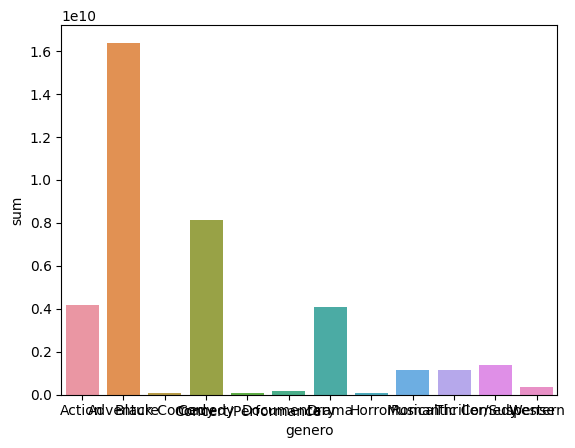

In [ ]:
sns.barplot(x=bilheteria_bruta_por_genero.index, y=bilheteria_bruta_por_genero['sum'], data=bilheteria_bruta_por_genero)

27 - Importe o seaborn com o apelido sns 

In [ ]:
import seaborn as sns
sns.set()

28 -Faça um boxplot comparando a bilheteria_ajustada_inflacao dos filmes de ação e comédia


In [ ]:
filmes_acao_comedia = dados[(dados['genero'] == 'Action') | (dados['genero'] == 'Comedy')][['genero', 'bilheteria_ajustada_inflacao']]
print(filmes_acao_comedia)

     genero  bilheteria_ajustada_inflacao
8    Comedy                    1362870985
9    Comedy                     310094574
11   Comedy                     109581646
14   Comedy                     138612686
16   Comedy                     101200742
..      ...                           ...
544  Action                     268013076
551  Comedy                      69055550
558  Action                     459005868
561  Action                     180202163
569  Action                     408084349

[222 rows x 2 columns]


<Axes: xlabel='bilheteria_ajustada_inflacao', ylabel='genero'>

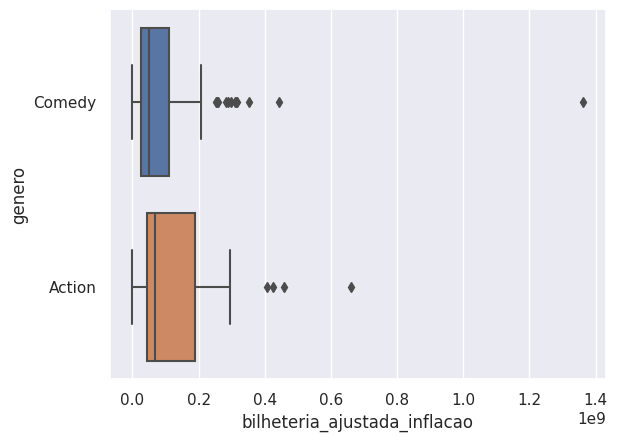

In [ ]:
sns.boxplot(x=filmes_acao_comedia['bilheteria_ajustada_inflacao'], y=filmes_acao_comedia['genero'], data=filmes_acao_comedia)